**Predict house prices using sklearn dataset**

---


@Toqa Alaa Awad
toqa22.alaa@gmail.com

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.datasets import fetch_california_housing
from xgboost import XGBRegressor
from sklearn import metrics

In [34]:
data = fetch_california_housing()

In [35]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [47]:
df= pd.DataFrame(data= data.data, columns= data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [49]:
df['Price']= data.target

In [50]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [51]:
df.shape

(20640, 9)

In [52]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

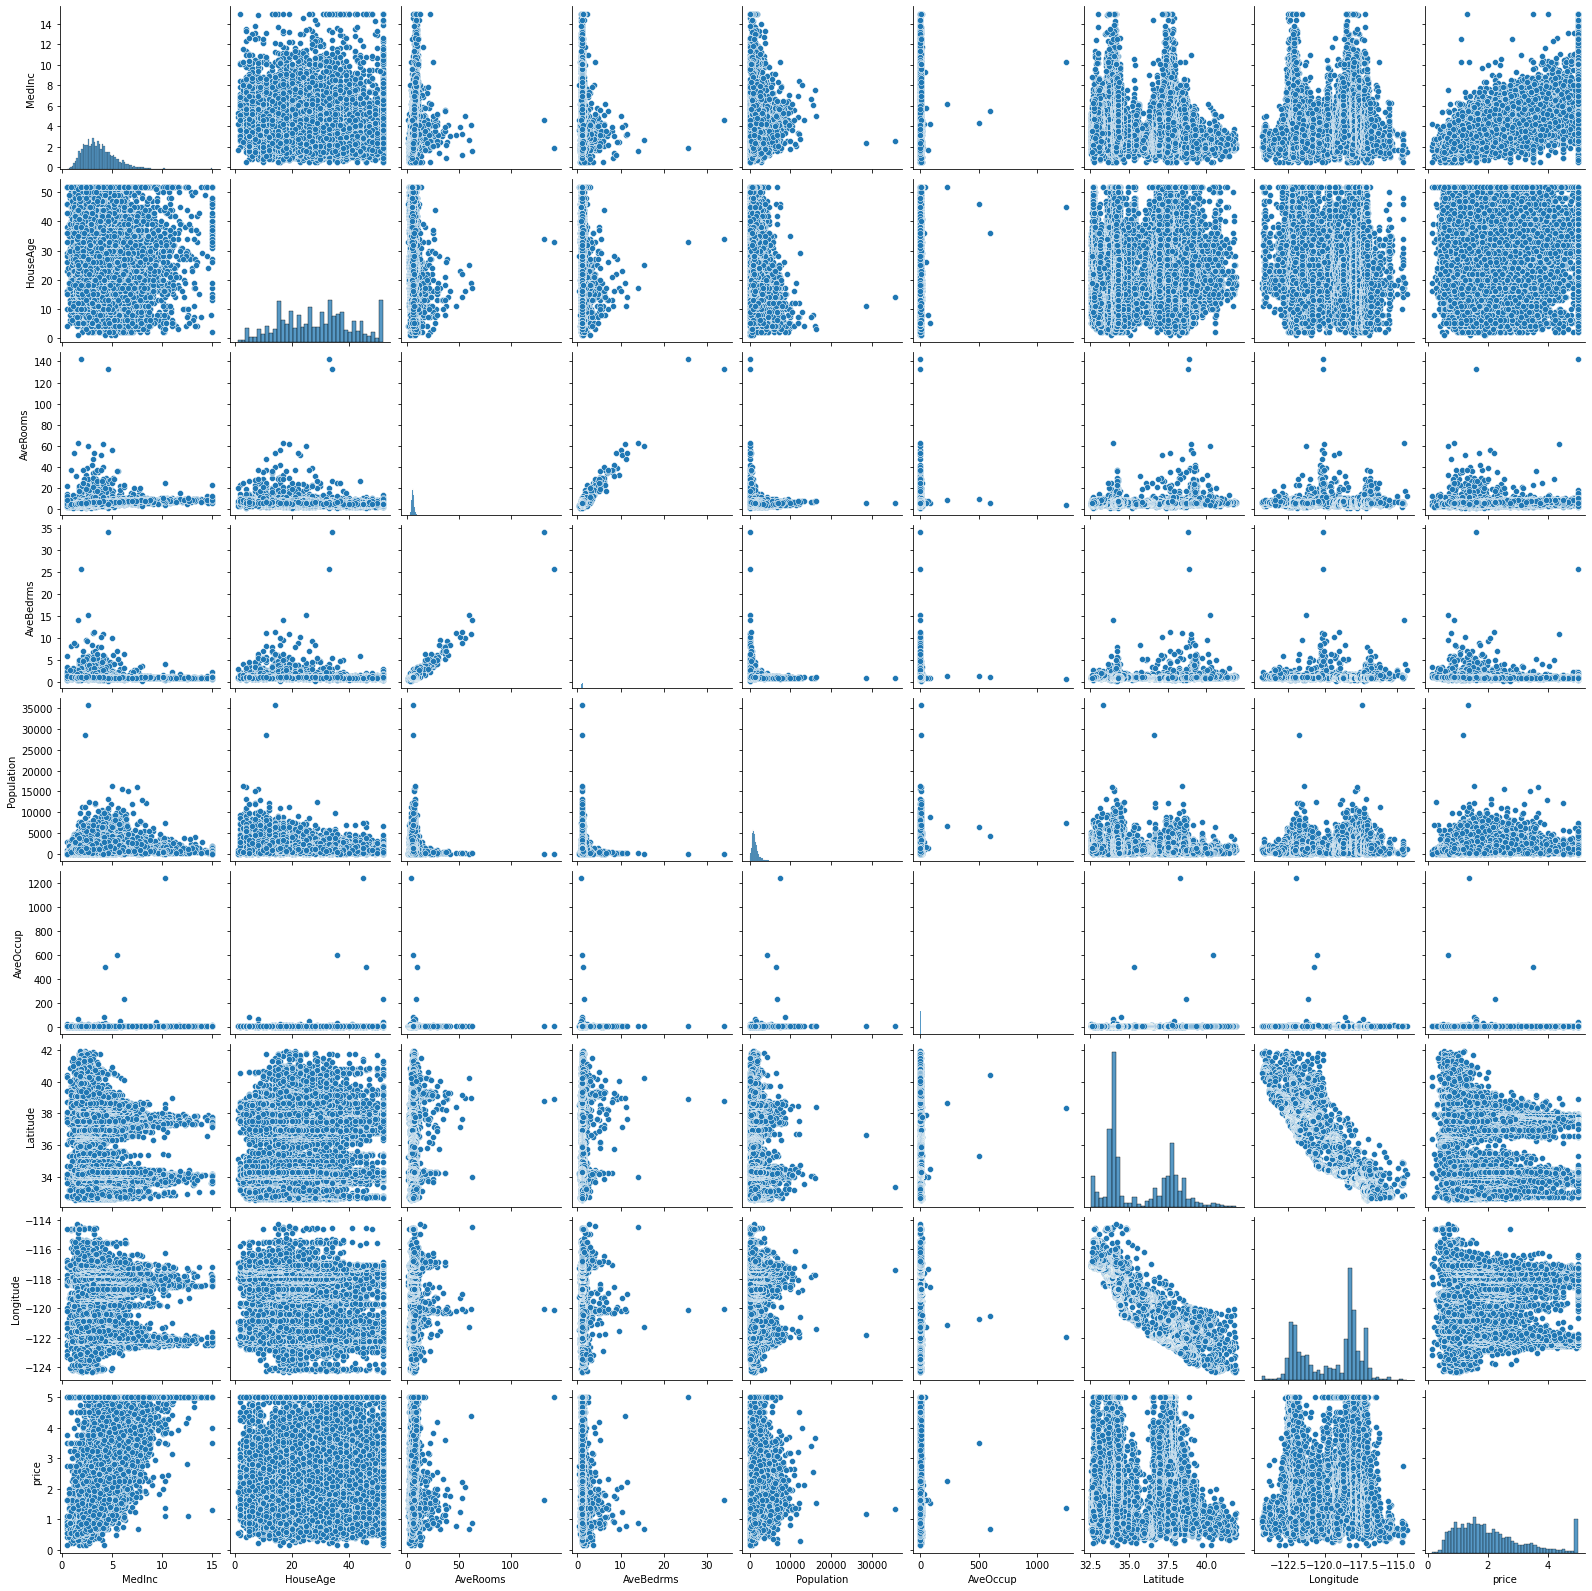

In [41]:
sns.pairplot(df)

In [54]:
X = df[['MedInc', 'HouseAge' , 'AveRooms', 'AveBedrms', 'Population','AveOccup','Latitude','Longitude']]

In [55]:
y= df['Price']

In [57]:
correlation = df.corr()

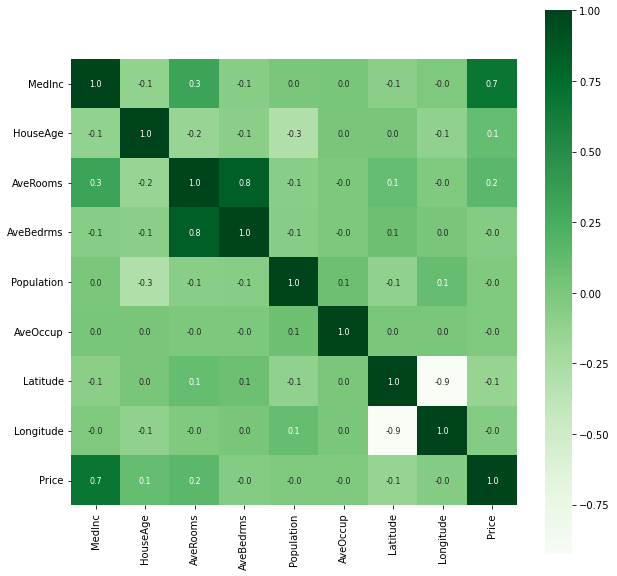

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

**Creating the model**

In [60]:
X = df.drop(['Price'], axis=1)
Y = df['Price']

In [62]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [69]:
model = XGBRegressor()

In [70]:
model.fit(X_train, Y_train)

[12:06:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [71]:
y_predict= model.predict(X_train)

In [72]:
print(y_predict)

[0.5106896 3.259647  0.7520858 ... 1.6448892 1.7609202 0.8609372]


**Evaluation**

In [76]:
R_squared_error = metrics.r2_score(Y_train, y_predict)

In [77]:
M_ABS_error = metrics.mean_absolute_error(Y_train, y_predict)

In [78]:
print('R Squared error:', R_squared_error)

R Squared error: 0.8040717007536332


In [79]:
print('Mean Squared error:', M_ABS_error)

Mean Squared error: 0.3567039052104632


**Actual Prices Vs Predicted Prices**



**Predict on train data**

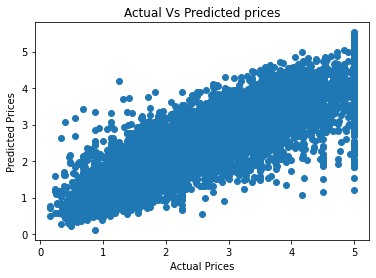

In [84]:
plt.scatter(Y_train, y_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Vs Predicted prices')
plt.show()

**Predict on Test data**


In [88]:
test_data_predict= model.predict(X_test)

In [92]:
R_squared_error = metrics.r2_score(Y_test, test_data_predict)
M_ABS_error = metrics.mean_absolute_error(Y_test, test_data_predict)
print('R Squared error:', R_squared_error)
print('Mean Squared error:', M_ABS_error)

R Squared error: 0.7827492630044839
Mean Squared error: 0.368917494311536


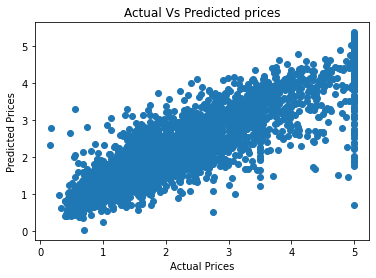

In [93]:
plt.scatter(Y_test, test_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Vs Predicted prices')
plt.show()